YES BANK STOCK CLOSING PRICE PREDICTION
---



##Problem Statement :

Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month.

##Objective:


The main objective is to predict the stock's closing price of the month.To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. 

The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.

##Importing the libraries

In [ ]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#method which is used to split the data to train and test set during model building
from sklearn.model_selection import train_test_split

#importing different models for  prediction



#importing matrix module evaluation for performance evaluation




#import vif method to reduce multicollinearity in independent variables



import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data set and read the files
df = pd.read_csv('/content/drive/MyDrive/Yes Bank _Project/data_YesBank_StockPrices.csv')

In [ ]:
#Reading the data
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Shape of the data
df.shape

(185, 5)

In [ ]:
#Basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
bank_df = df.copy() #Creating a copy of our dataset so that changes don't reflect in the original dataset

##Checking the null and duplicate values

In [ ]:
bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(bank_df[bank_df.duplicated()])

0



*   There are no Null Values found.
*   There are no Duplicate Values found.



##Feature Description : 
**Date** :- Date denotes the date of investment(date contains month and year for a particular price) (Object)

**Open** :- Means the price at which a stock started trading (Numerical).

**High** :-The high is the highest price at which a stock traded during a period (Numerical).

**Low** :-The low is the minimum price at which a stock traded during a period (Numerical).

**Close** :- The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a dependent variable which we need to predict from our respetive ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

In [ ]:
#Statistical Summary
bank_df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


###Checking andd Rectifying the date format if needed

In [ ]:
bank_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

Ok so as we can see format of Date is in "MMMM-YY",So we need to convert into proper format

In [ ]:
#Converting the date format using datetime() 
bank_df['Date'] = pd.to_datetime(bank_df['Date'].apply (lambda x : datetime.strptime(x, '%b-%y')))
bank_df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

ML models like Linear Regression won't work on "Date" data, as we need to convert into numerical column. But, In our case numerical data would have no use to predict the goal. So, we'd rather make the "Date" Column as dataframe index.

In [ ]:
bank_df.set_index('Date',inplace=True)

In [ ]:
bank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


Only 4 Feature Columns are left, let's get started with Exploratory Data Analysis

#Exploratory Data Analysis

Text(0.5, 1.0, 'Close stock price distribution plot')

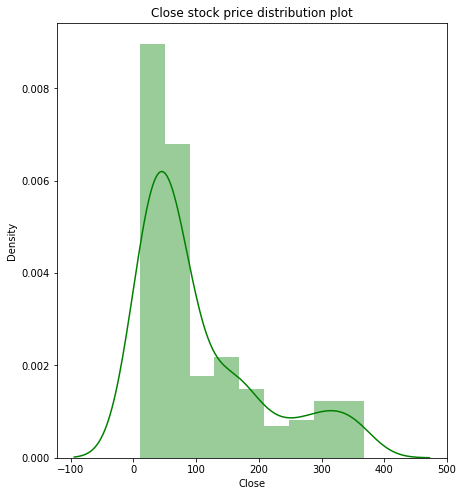

In [ ]:
#ploting the histogram to see "close" (dependent variable) 
plt.figure(figsize=(7,8))
sns.distplot(bank_df['Close'], color = "green")
plt.title("Close stock price distribution plot")

As we can see  It's a **Positively Skewed Distribution**, let's make it **Normal Distribution** using **Log transformation**

Text(0.5, 1.0, 'Distribution plot of Close Price after log transformation')

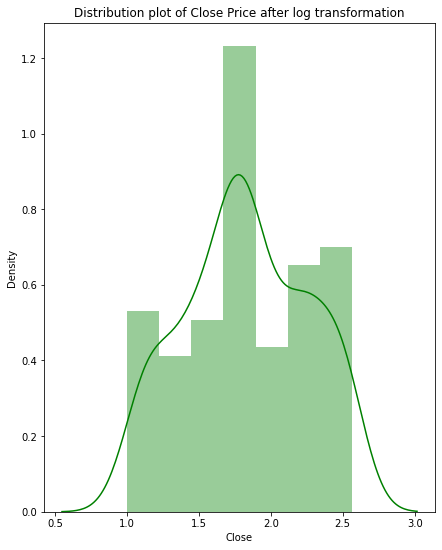

In [ ]:
#Log transformation of dependent variable "Close"
plt.figure(figsize=(7,9))
sns.distplot(np.log10(bank_df['Close']),color = 'green')
plt.title("Distribution plot of Close Price after log transformation")

Normally Distributed Graph

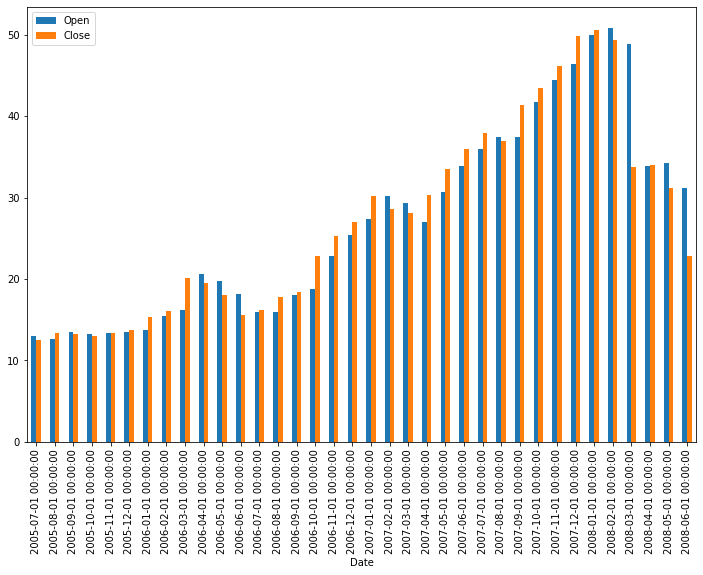

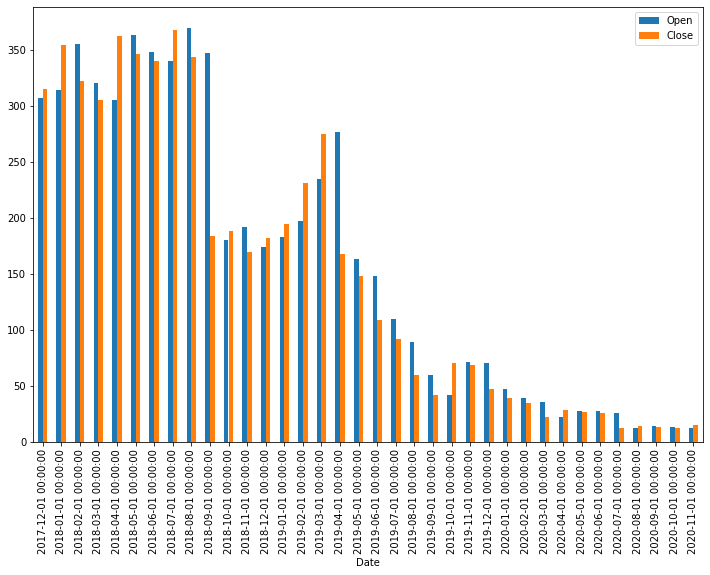

In [ ]:
#Plot Open vs Close price using bar graph
bank_df[['Open','Close']].head(36).plot(kind='bar',figsize=(12,8))
plt.show()
bank_df[['Open','Close']].tail(36).plot(kind='bar',figsize=(12,8)) # show only last three year record
plt.show()

###Numerical Features


In [ ]:
num_features = bank_df.describe().columns 
num_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

All the columns in the dataset are numerical in the dataset

#Outlier Detection 


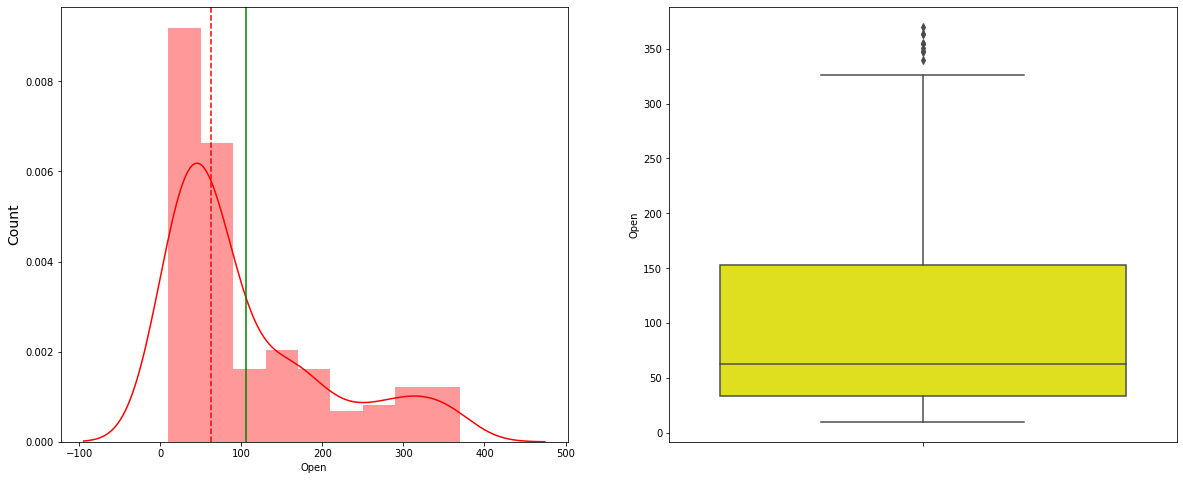

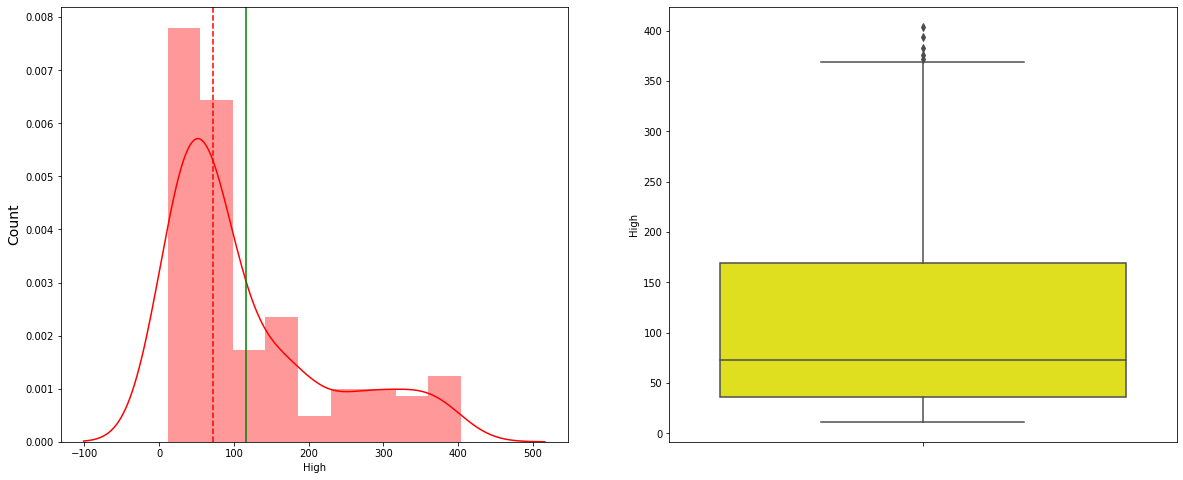

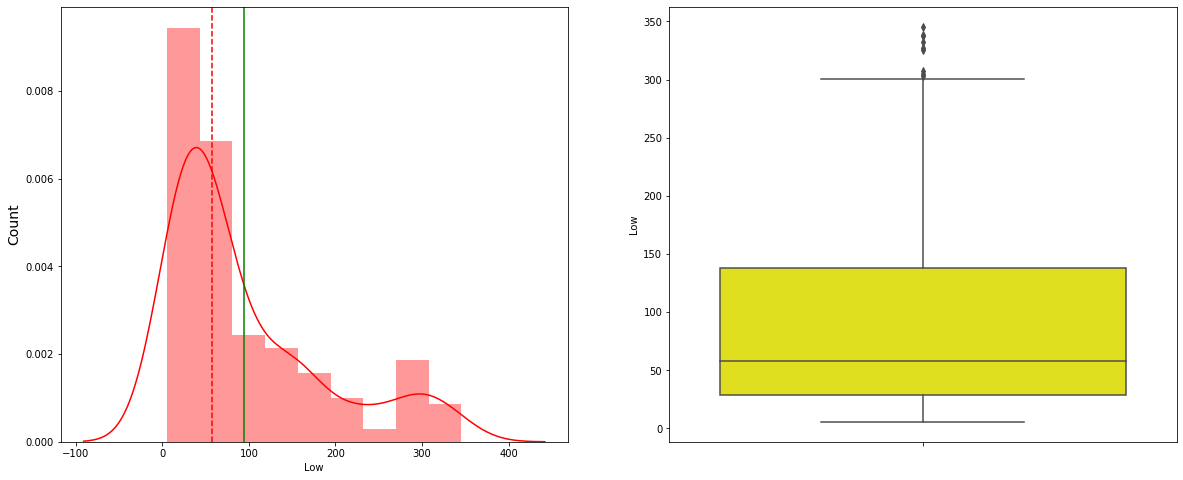

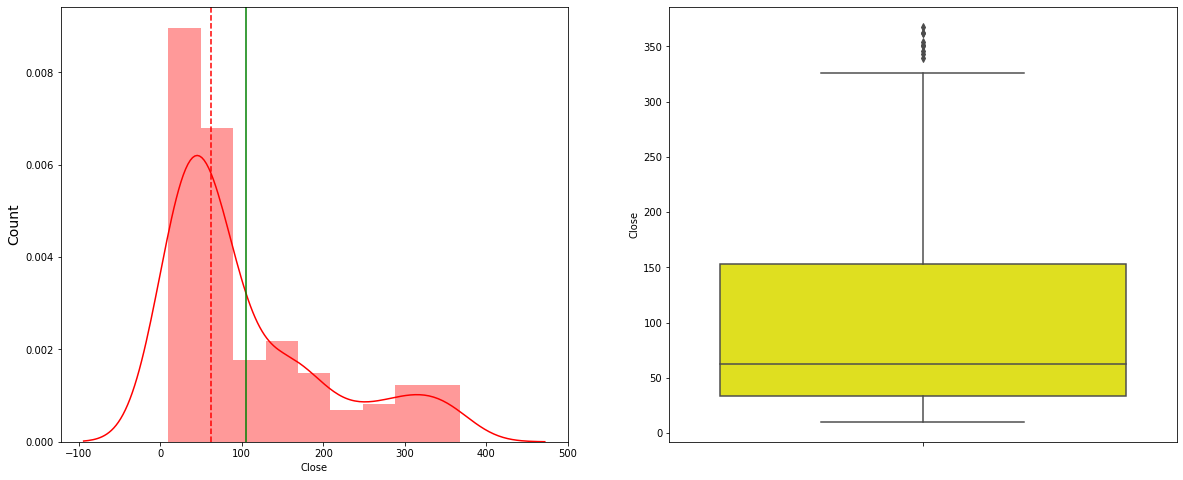

In [ ]:
#ploting a graph for each numerical feature
for col in num_features:
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  sns.distplot(bank_df[col],color='red')


  plt.ylabel("Count", size = 14)
  plt.axvline(df[col].mean(),color='green', linewidth=1.5)
  plt.axvline(df[col].median(),color = 'red', linestyle = "dashed", linewidth=1.5)

  plt.subplot(1,2,2)
  sns.boxplot(y=bank_df[col], color ='yellow')
plt.show()